In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams.update({'font.size': 16})

### Analyze results from 800 FE experiment

In [2]:
### Analyze results from 800 FE experiment
tasks = [1,2,4,8,16]
seeds = list(range(5))
colors = [cm.get_cmap('tab10')(v) for v in (0.05, 0.95, 0.85, 0.15, 0.35)]
labels = ['16 CPU/FE','8 CPU/FE','4 CPU/FE','2 CPU/FE','1 CPU/FE']
experiment = '800FE'

In [3]:
### read in operators data
operators = []
for i in range(len(tasks)):
    for j in range(len(seeds)):
        task = tasks[i]
        seed = seeds[j]
        df = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.NFE', sep=' ', header=None)
        for o in ['DE','PCX','SBX','SPX','UM','UNDX','ElapsedTime']:
            df[o] = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.{o}', sep=' ', header=None)[0].values
        df.index = df[0]
        df = df.iloc[:, 1:]
        ncols = df.shape[1]
        cols = df.columns[:-1]
        operators.append(df)

In [4]:
cols

Index(['DE', 'PCX', 'SBX', 'SPX', 'UM', 'UNDX'], dtype='object')

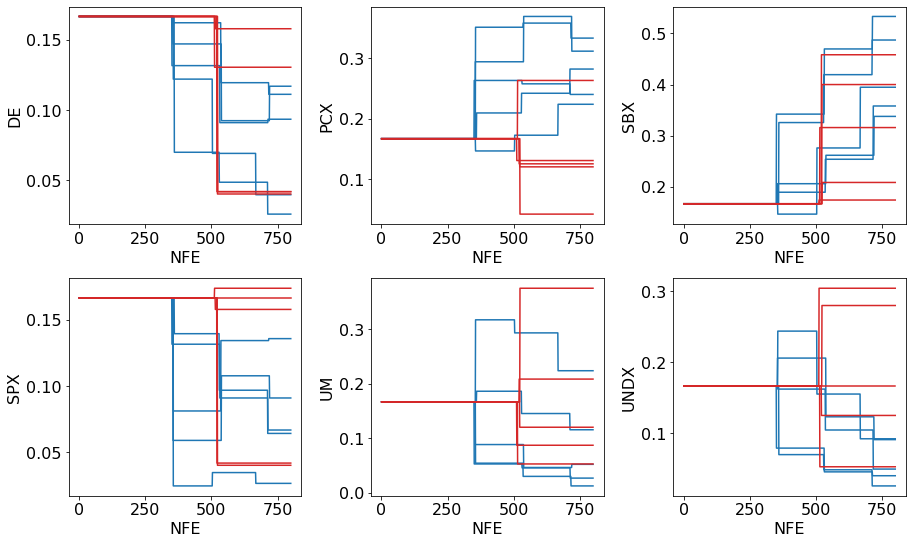

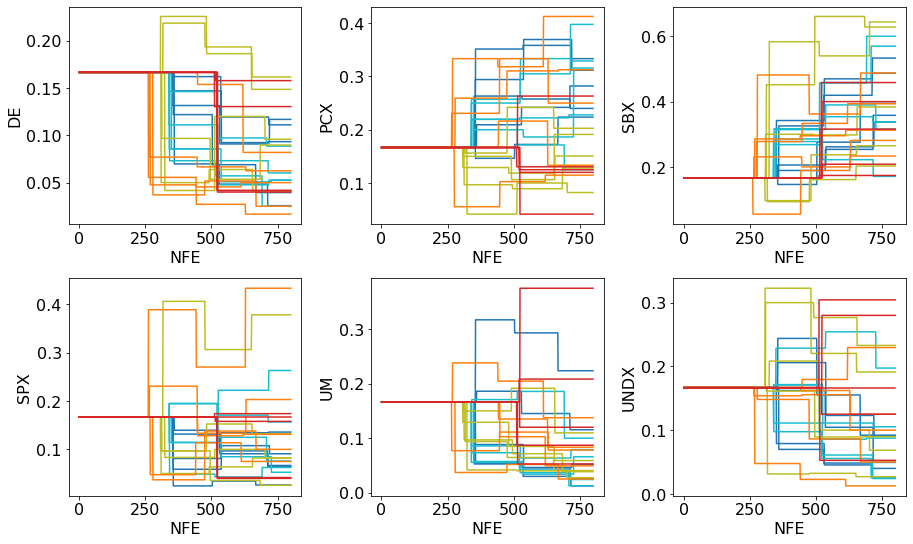

In [5]:
### plot operators
fig, axs = plt.subplots(2,3,figsize=(15,9), gridspec_kw={'hspace':0.25, 'wspace':0.3})
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for task in range(len(tasks)):
        for seed in range(len(seeds)):
            if task in [0,4]:
                ax.plot(operators[count].iloc[:, c], color=colors[task])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1
        
plt.savefig(f'figs/operators_{experiment}.png', bbox_inches='tight')

### plot operators
fig, axs = plt.subplots(2,3,figsize=(15,9), gridspec_kw={'hspace':0.25, 'wspace':0.3})
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for task in range(len(tasks)):
        for seed in range(len(seeds)):
            ax.plot(operators[count].iloc[:, c], color=colors[task])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1
        
plt.savefig(f'figs/operators_full_{experiment}.png', bbox_inches='tight')

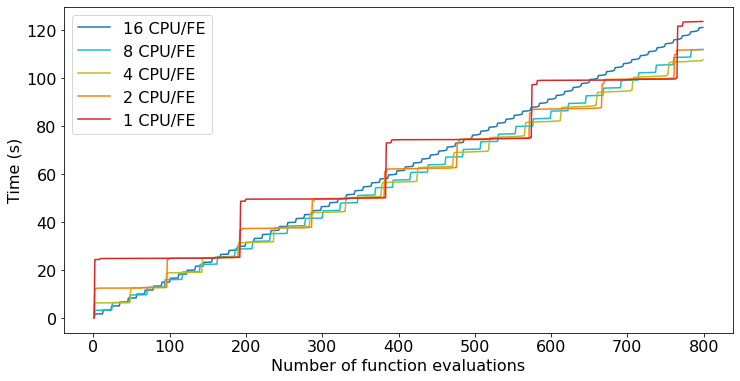

In [6]:
### plot elapsed time
plt.figure(figsize=(12,6))
count = 0
num_steps = -1
for task in range(len(tasks)):
    for seed in range(len(seeds)):
        if seed==0:
            plt.plot(operators[count]['ElapsedTime'][:num_steps], color=colors[task], label=labels[task])
        count += 1
plt.legend()
plt.xlabel('Number of function evaluations')
plt.ylabel('Time (s)')
plt.savefig(f'figs/time_scaling_{experiment}.png', bbox_inches='tight')

In [7]:
metrics = []
for i in range(len(tasks)):
    for j in range(len(seeds)):
        task = tasks[i]    
        seed = seeds[j]
        df = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.metrics', sep=' ')
        df.index = operators[i].index[-df.shape[0]:]
        df.columns = ['Hypervolume', 'Geerational distance', 'Inverted generational distance', 'Spacing', 'Epsilon indicator', 'Maximum Pareto front error']
        ### insert 0's for missing rows (borg doesn't output metrics until archive is nonzero)
        zero_fes = df.index[0]
        zero_fe_fill = df.iloc[:zero_fes]*0.
        zero_fe_fill.reset_index(inplace=True, drop=True)
        df = df.append(zero_fe_fill)
        df.sort_index(inplace=True)
        ncols = df.shape[1]
        cols = df.columns
        metrics.append(df)

In [8]:
metrics[0]

,Hypervolume,Geerational distance,Inverted generational distance,Spacing,Epsilon indicator,Maximum Pareto front error
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
796,0.570763,0.017493,0.115032,0.152319,0.310156,0.333267
797,0.570763,0.017493,0.115032,0.152319,0.310156,0.333267
798,0.570763,0.017493,0.115032,0.152319,0.310156,0.333267
799,0.570763,0.017493,0.115032,0.152319,0.310156,0.333267


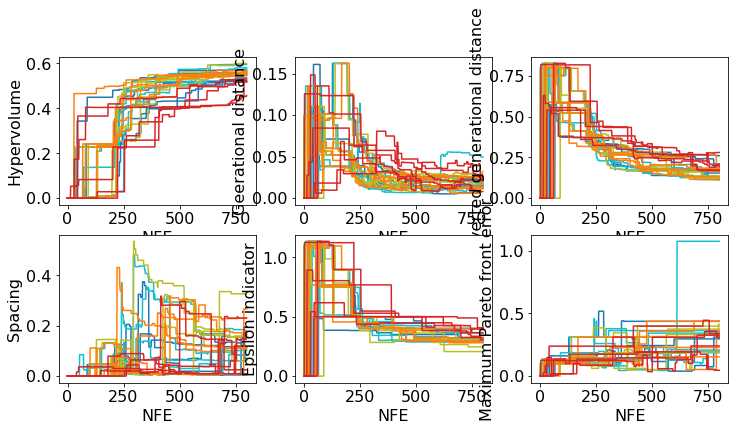

In [9]:
### plot metrics
fig, axs = plt.subplots(2,3,figsize=(12,6))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for task in range(len(tasks)):
        for seed in range(len(seeds)):
            ax.plot(metrics[count].iloc[:num_steps, c], color=colors[task])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1

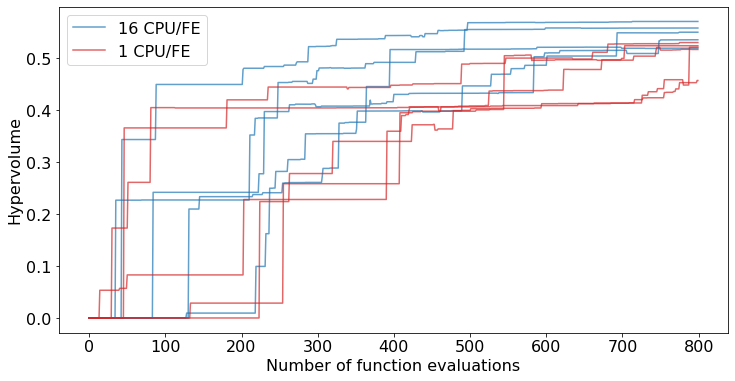

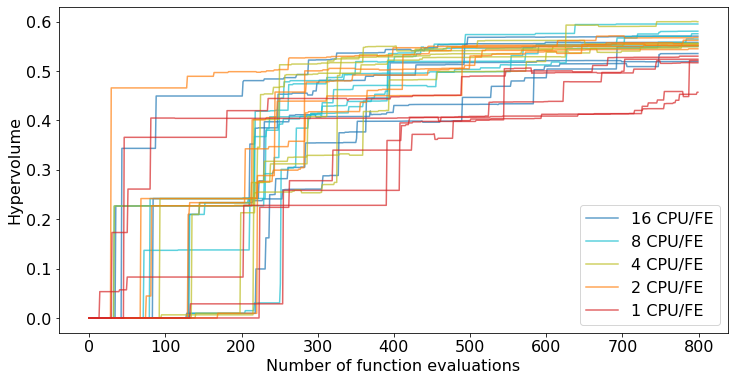

In [10]:
### plot elapsed hypervolume of particular seeds
plt.figure(figsize=(12,6))
count = 0
for task in range(len(tasks)):
    for seed in range(len(seeds)):
        if task in [0,4]:
            if seed==0:
                plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], label=labels[task], alpha=0.7)
            else:
                plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], alpha=0.7)
        count += 1
plt.xlabel('Number of function evaluations')
plt.ylabel('Hypervolume')
plt.legend()
plt.savefig(f'figs/hv_scaling_{experiment}.png', bbox_inches='tight')

### plot elapsed hypervolume of particular seeds
plt.figure(figsize=(12,6))
count = 0
for task in range(len(tasks)):
    for seed in range(len(seeds)):
        if seed==0:
            plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], label=labels[task], alpha=0.7)
        else:
            plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], alpha=0.7)
        count += 1
plt.xlabel('Number of function evaluations')
plt.ylabel('Hypervolume')
plt.legend()
plt.savefig(f'figs/hv_scaling_full_{experiment}.png', bbox_inches='tight')

### Analyze results from 10k FE experiment

In [11]:
### Analyze results from 800 FE experiment
tasks = [1,16]
seeds = list(range(5))
colors = [cm.get_cmap('tab10')(v) for v in (0.05, 0.35)]
labels = ['16 CPU/FE','1 CPU/FE']
experiment = '10kFE'

In [12]:
### read in operators data
operators = []
for i in range(len(tasks)):
    for j in range(len(seeds)):
        task = tasks[i]
        seed = seeds[j]
        df = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.NFE', sep=' ', header=None)
        for o in ['DE','PCX','SBX','SPX','UM','UNDX','ElapsedTime']:
            df[o] = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.{o}', sep=' ', header=None)[0].values
        df.index = df[0]
        df = df.iloc[:, 1:]
        ncols = df.shape[1]
        cols = df.columns[:-1]
        operators.append(df)

In [13]:
cols

Index(['DE', 'PCX', 'SBX', 'SPX', 'UM', 'UNDX'], dtype='object')

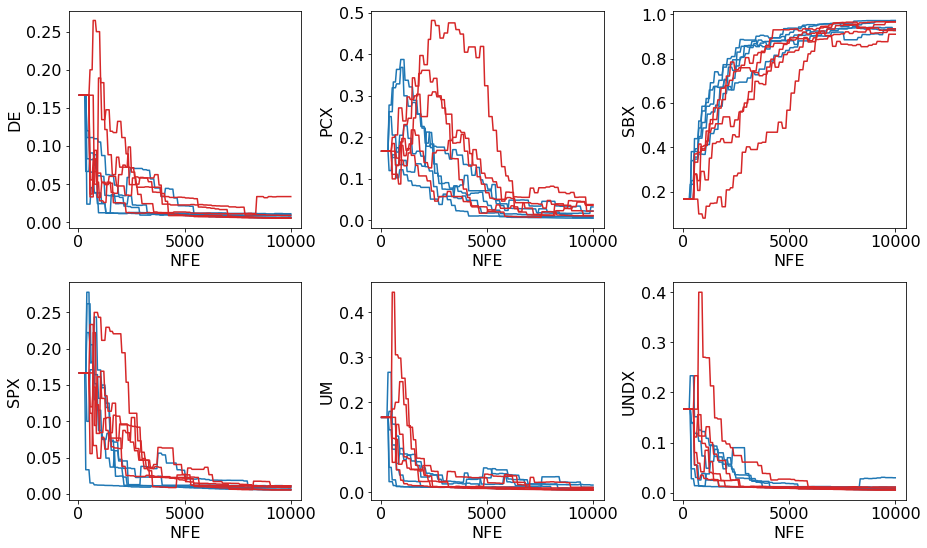

In [14]:
### plot operators
fig, axs = plt.subplots(2,3,figsize=(15,9), gridspec_kw={'hspace':0.25, 'wspace':0.3})
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for task in range(len(tasks)):
        for seed in range(len(seeds)):
            ax.plot(operators[count].iloc[:, c], color=colors[task])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1
        
plt.savefig(f'figs/operators_{experiment}.png', bbox_inches='tight')

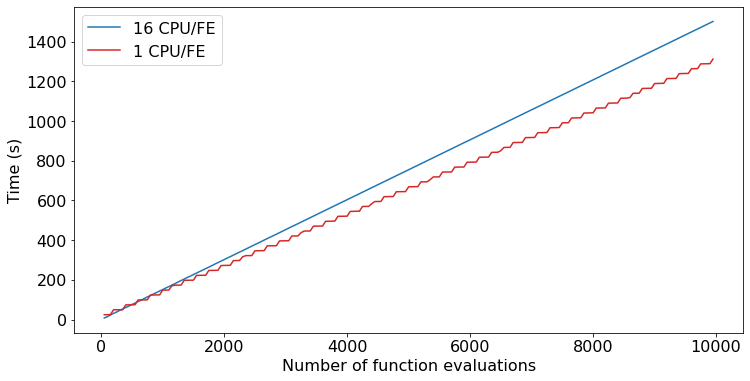

In [15]:
### plot elapsed time
plt.figure(figsize=(12,6))
count = 0
num_steps = -1
for task in range(len(tasks)):
    for seed in range(len(seeds)):
        if seed==0:
            plt.plot(operators[count]['ElapsedTime'][:num_steps], color=colors[task], label=labels[task])
        count += 1
plt.legend()
plt.xlabel('Number of function evaluations')
plt.ylabel('Time (s)')
plt.savefig(f'figs/time_scaling_{experiment}.png', bbox_inches='tight')

In [16]:
metrics = []
for i in range(len(tasks)):
    for j in range(len(seeds)):
        task = tasks[i]    
        seed = seeds[j]
        df = pd.read_csv(f'results_{experiment}/msmp_{task}task_s{seed}.metrics', sep=' ')
        df.index = operators[i].index[-df.shape[0]:]
        df.columns = ['Hypervolume', 'Geerational distance', 'Inverted generational distance', 'Spacing', 'Epsilon indicator', 'Maximum Pareto front error']
        ### insert 0's for missing rows (borg doesn't output metrics until archive is nonzero)
        zero_fes = df.index[0]
        zero_fe_fill = df.iloc[:zero_fes]*0.
        zero_fe_fill.reset_index(inplace=True, drop=True)
        df = df.append(zero_fe_fill)
        df.sort_index(inplace=True)
        ncols = df.shape[1]
        cols = df.columns
        metrics.append(df)

In [17]:
metrics[0]

,Hypervolume,Geerational distance,Inverted generational distance,Spacing,Epsilon indicator,Maximum Pareto front error
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
9800,0.611351,0.001614,0.039407,0.035898,0.057357,0.062026
9850,0.611484,0.001625,0.039089,0.040987,0.057357,0.062026
9900,0.611897,0.001699,0.038357,0.040452,0.057357,0.067433
9950,0.612171,0.001721,0.038299,0.039932,0.057357,0.067433


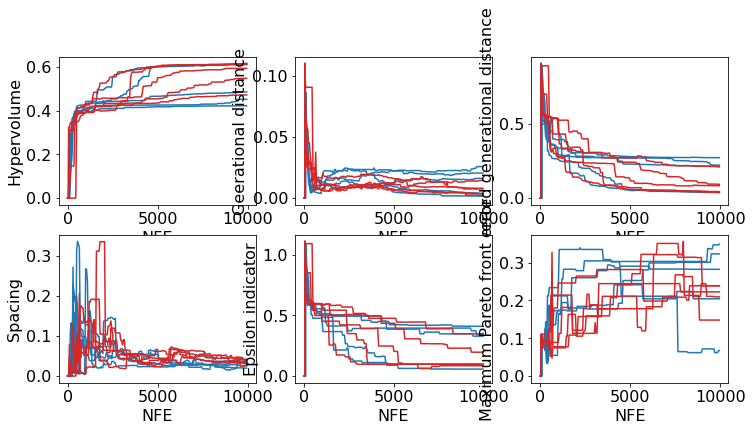

In [18]:
### plot metrics
fig, axs = plt.subplots(2,3,figsize=(12,6))
j = 0
k = 0
for c, col in enumerate(cols):
    ax = axs[k,j]
    count = 0
    for task in range(len(tasks)):
        for seed in range(len(seeds)):
            ax.plot(metrics[count].iloc[:num_steps, c], color=colors[task])
            count += 1
    ax.set_ylabel(col)
    ax.set_xlabel('NFE')
    j += 1
    if j == 3:
        j = 0
        k += 1

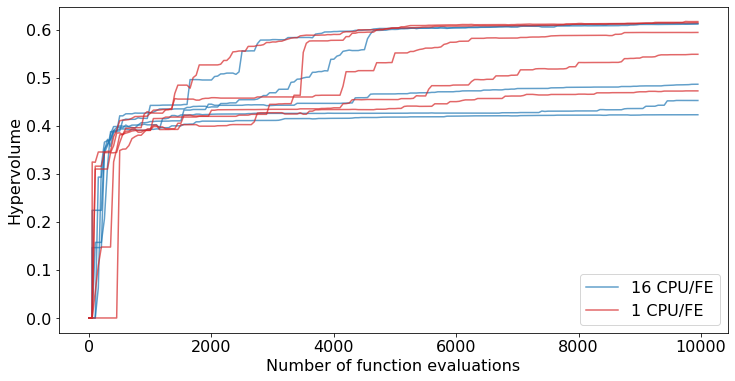

In [19]:
### plot elapsed hypervolume of particular seeds
plt.figure(figsize=(12,6))
count = 0
for task in range(len(tasks)):
    for seed in range(len(seeds)):
        if seed==0:
            plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], label=labels[task], alpha=0.7)
        else:
            plt.plot(metrics[count]['Hypervolume'][:num_steps], color=colors[task], alpha=0.7)
        count += 1
plt.xlabel('Number of function evaluations')
plt.ylabel('Hypervolume')
plt.legend()
plt.savefig(f'figs/hv_scaling_{experiment}.png', bbox_inches='tight')